# 1. Exploratory Data Analysis

In [81]:
# set matplotlib backend to inline
%matplotlib inline

# import modules
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### Visualisation interactions between different pairings of features

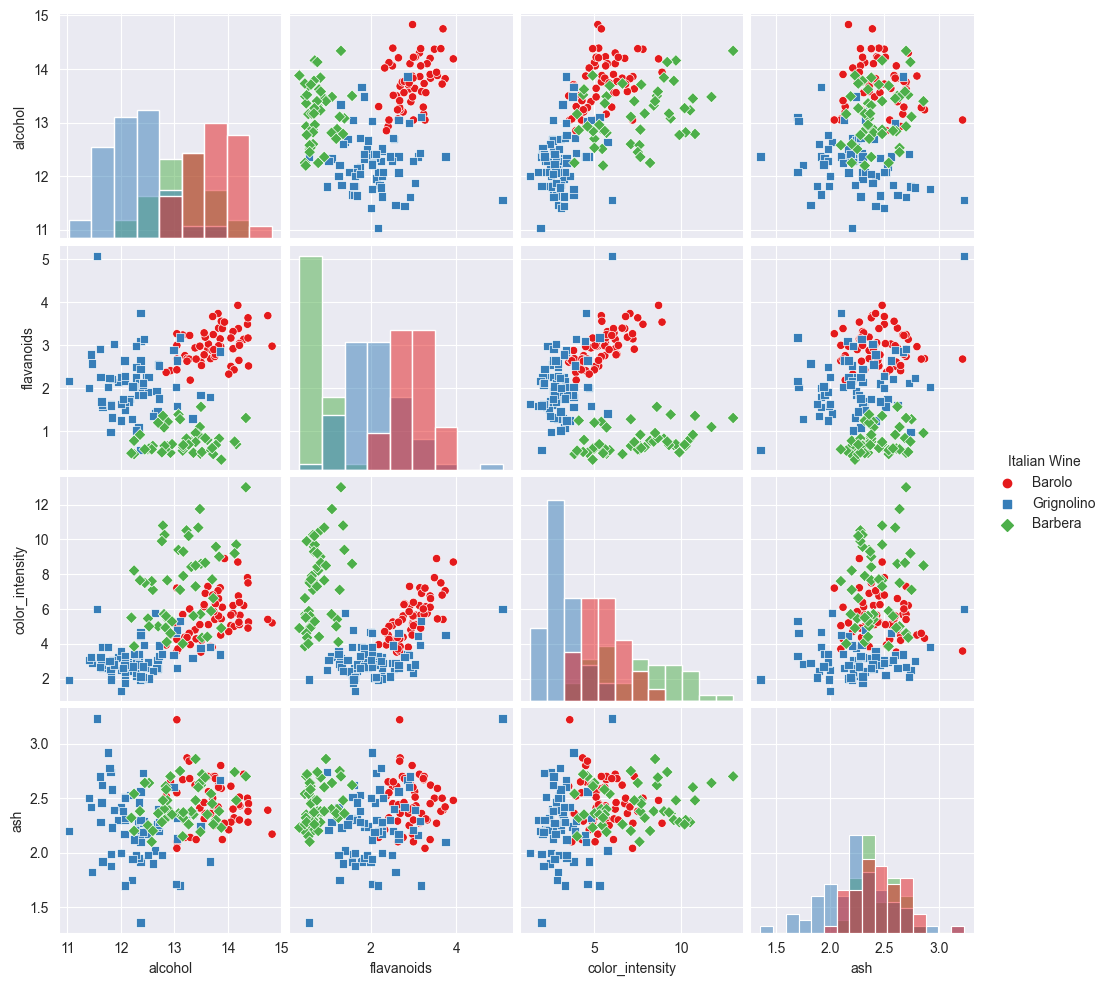

In [122]:
import seaborn as sns
# define plotting function
def myplotGrid(a, b):
     # Create a DataFrame from the input data
    data = pd.DataFrame(a, columns=selected_features)
    # Add the labels to the DataFrame
    data['Italian Wine'] = b
    # these are the names of the italian wines
    data['Italian Wine'] = data['Italian Wine'].map({
        0: 'Barolo',
        1: 'Grignolino',
        2: 'Barbera'
    })
    #
    # Create a scatter plot matrix
    sns.pairplot(data, diag_kind='hist', hue='Italian Wine', palette='Set1', markers=["o", "s", "D"])
# run the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

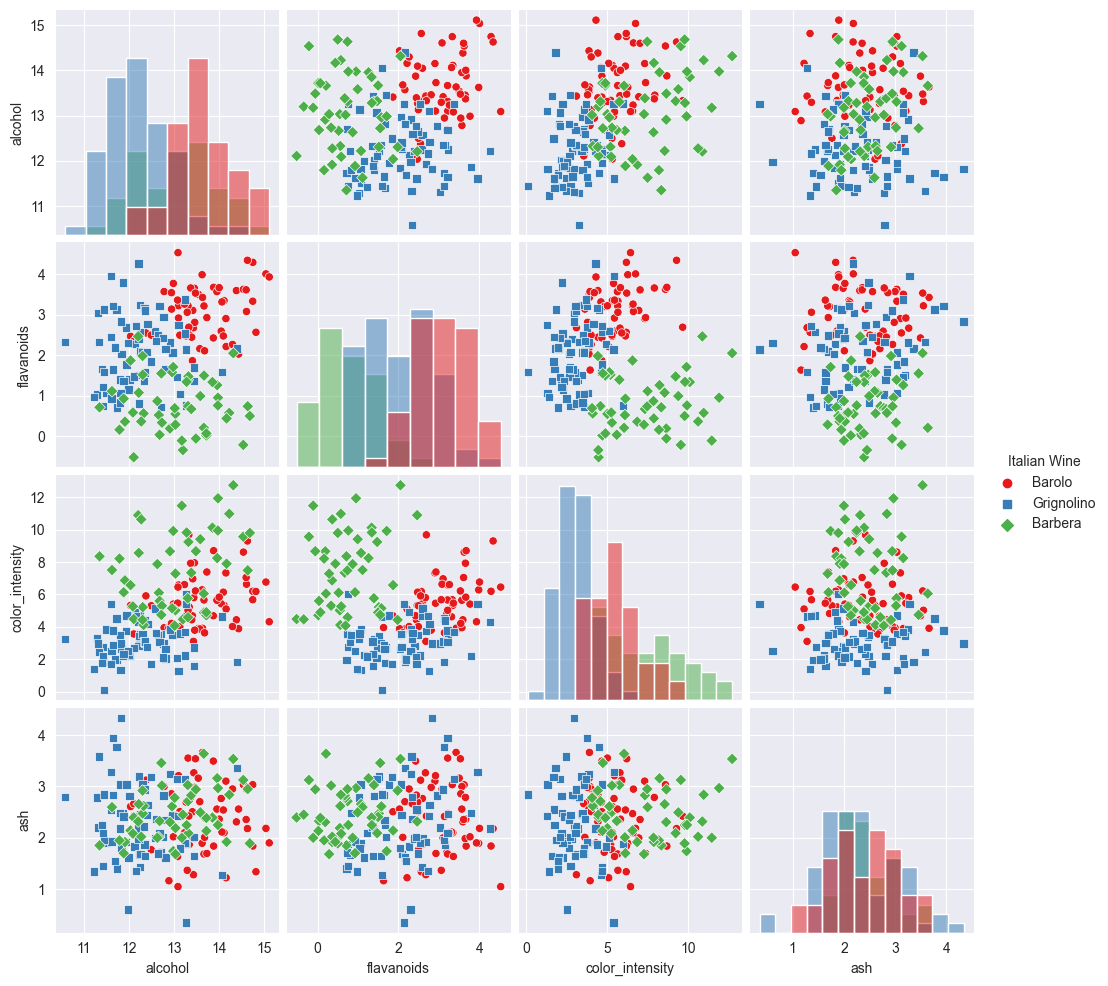

In [115]:
mySeed = 12345
np.random.seed(mySeed)
XN = X+np.random.normal(0,0.6,X.shape)

myplotGrid(XN,y)

## Q1. Exploratory data analysis

In [116]:
data_features = df_wine[selected_features]
data_features.head()

,alcohol,flavanoids,color_intensity,ash
0,14.23,3.06,5.64,2.43
1,13.20,2.76,4.38,2.14
2,13.16,3.24,5.68,2.67
3,14.37,3.49,7.80,2.50
4,13.24,2.69,4.32,2.87


In [117]:
data_features.shape

(178, 4)

In [118]:
data_features.describe()

,alcohol,flavanoids,color_intensity,ash
count,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.029270,5.058090,2.366517
std,0.811827,0.998859,2.318286,0.274344
min,11.030000,0.340000,1.280000,1.360000
25%,12.362500,1.205000,3.220000,2.210000
50%,13.050000,2.135000,4.690000,2.360000
75%,13.677500,2.875000,6.200000,2.557500
max,14.830000,5.080000,13.000000,3.230000


In [119]:
data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   alcohol          178 non-null    float64
 1   flavanoids       178 non-null    float64
 2   color_intensity  178 non-null    float64
 3   ash              178 non-null    float64
dtypes: float64(4)
memory usage: 5.7 KB


## Feature Selection

If i were to build a classifier using only two of the available features, i would choose color_intensity & flavanoids

<div class="alert alert-block alert-info">From the Visualisation interactions between different pairings of features above (clean data), we can see that the feature :
- ash : has no effect on the wine quality: the classes overlap, which may indicate that the feature is not good predictor.
- alcohol : has a weak effect on the wine quality: the classes overlap a bit, but it indicate that the model might still perform well.
- color_intensity & flavanoids : the visualization shows that these features are a good predictors.</div>


<div class="alert alert-block alert-warning">although we can consider visualization as a good feature selection method, we need to use other methods to confirm our selections</div>

## Using different methods:

In [124]:
df_wine_feature = data_features.copy()
df_wine_feature['Class'] = y
# create the target variable
target = df_wine_feature['Class']
# I choose '0.7' as a threshold instead of '0.5', because i need only two features to build a classifier.
# with '0.5' alcohol will be included in the feature selection.
threshold = 0.7
# create the feature set
features = df_wine_feature.drop(['Class'], axis=1)

### Mean Absolute Deviation

In [125]:
mad = np.abs(features - features.mean()).mean()
# select features with a MAD greater than a threshold
selected_features_mad = features.columns[mad > threshold]
# print the selected features
print(selected_features_mad)

Index(['flavanoids', 'color_intensity'], dtype='object')


### VarianceThreshold

In [126]:
from sklearn.feature_selection import VarianceThreshold

# Use the VarianceThreshold class to select the features with a variance above a threshold
selector = VarianceThreshold(threshold=threshold)
selected_features = selector.fit_transform(features)

# get the names of the selected features
selected_features_var = features.columns[selector.get_support()]

# print the selected features
print(selected_features_var)

Index(['flavanoids', 'color_intensity'], dtype='object')


### Select Percentile

In [127]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2

percentile = 30
selector = SelectPercentile(score_func=chi2, percentile=percentile)
selector.fit(features, target)

# get the selected feature indexes
selected_features_indexes = selector.get_support(indices=True)

# get the names of the selected features
selected_features_per = features.columns[selected_features_indexes]

# print the selected features
print(selected_features_per)

Index(['color_intensity'], dtype='object')


### Mutual Information-based Feature Selection (MIFS)

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Use the SelectKBest class to select the top k features using mutual information
k = 2
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(features, target)

# get the selected feature indexes
selected_features_indexes = selector.get_support(indices=True)

# get the names of the selected features
selected_features_mifs = features.columns[selected_features_indexes]

# print the selected features
print(selected_features_mifs)

Index(['flavanoids', 'color_intensity'], dtype='object')


### GenericUni variateSelect

In [128]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif

# Use the Generic Univariate Select class to select the top 2 features using mutual information
k = 2
selector = GenericUnivariateSelect(score_func=mutual_info_classif, mode='k_best', param=k)
selector.fit(features, target)

# get the selected feature indexes
selected_features_indexes = selector.get_support(indices=True)

# get the names of the selected features
selected_features_gus = features.columns[selected_features_indexes]

# print the selected features
print(selected_features_gus)

Index(['flavanoids', 'color_intensity'], dtype='object')


<div class="alert alert-block alert-warning">I didn't need to use all of those methods. 2 methods or 3 to confirm will be fine</div>

## Q2. Data with noise

When plotting data without noise, the points on the graph will likely be tightly clustered and form a clear pattern or trend. When plotting data with added Gaussian noise, the points on the graph will appear more scattered and it may be more difficult to discern any underlying pattern or trend. The added noise can also make it difficult to detect any outliers or anomalies in the data. Additionally, the Gaussian noise will be randomly distributed across the data, making it difficult to predict the exact effect it will have on the plotted data.

# 2. Implementing k-Nearest Neighbours

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [228]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Predict the labels for the test data
predictions = knn.predict(X_test)
predictions

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0])

In [14]:
# manhattan_distance function
def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# euclidean_distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-Nearest_neighbours function
def mykNN(a_train, b_train, a_test, k, option):
    predict_knn = []
    distance_methods = {'euclidean': euclidean_distance, 'manhattan': manhattan_distance}
    for x_test in a_test:
        distances = [distance_methods[option](x_test, x) for x in a_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [b_train[i] for i in k_indices]
        from collections import Counter
        label_counts = Counter(k_nearest_labels)
        predict_knn.append(max(label_counts, key=label_counts.get))
    return np.array(predict_knn)

y_ = mykNN(X_train, y_train, X_test, k,'euclidean')
y_

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

# 3. Classifier evaluation

## Confusion matrix

In [15]:
def confusion_matrix(y_true, y_pred):
    # Find the unique elements of the y_test
    unique_labels = np.unique(y_true)
    # number of classes/labels
    num_labels = unique_labels.shape[0]
    # create a matrix with only zeros
    conf_mat = np.zeros((num_labels, num_labels))

    # looping through the true values and the predicted ones
    # and check what value the model predicted accurately
    for i in range(num_labels):
        for j in range(num_labels):
            conf_mat[i, j] = np.sum((y_true == unique_labels[i]) & (y_pred == unique_labels[j]))

    # return the result
    return conf_mat

cm = confusion_matrix(y_test, y_)
cm

array([[14.,  0.,  0.],
       [ 1., 13.,  0.],
       [ 0.,  0.,  8.]])

In [16]:
def con_mat_plt(plot):
    plt.figure(figsize=(10, 6))
    fx = sns.heatmap(plot, annot=True, fmt=".0f", cmap="BuPu")
    # Labels
    fx.set_title('Confusion Matrix \n')
    fx.set_xlabel('\n Predicted Values\n')
    fx.set_ylabel('Actual Values\n')

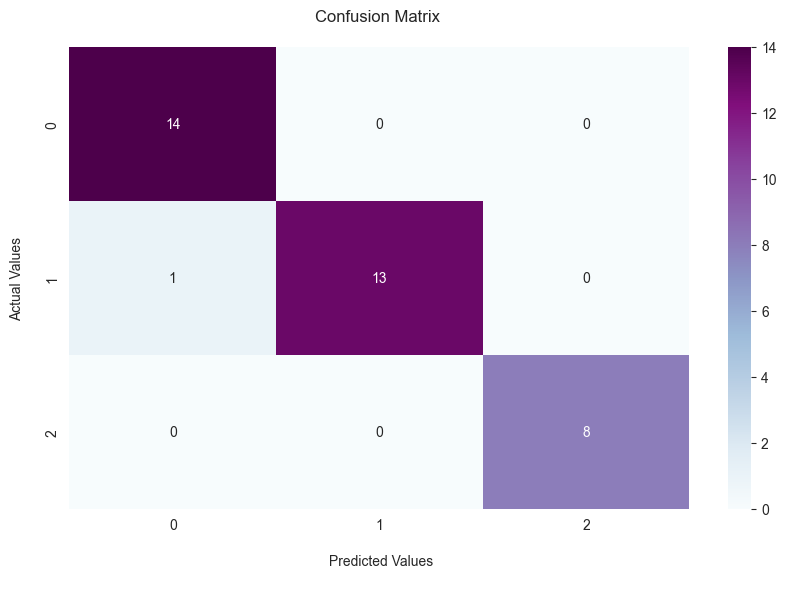

In [17]:
con_mat_plt(cm)

### Calculating metrics

In [18]:
#-----------------------------
FP = cm.sum(axis=0) - np.diag(cm) # False Positive
FN = cm.sum(axis=1) - np.diag(cm) # False Negative
TP = np.diag(cm) # True Positive
TN = cm.sum() - (FP + FN + TP) # True Negative

# ----------------------------
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
# Specificity or true negative rate
TNR = TN / (TN + FP)
# Precision or positive predictive value
PPV = TP / (TP + FP)
# Negative predictive value
NPV = TN / (TN + FN)
# Fall out or false positive rate
FPR = FP / (FP + TN)
# False negative rate
FNR = FN / (TP + FN)
# False discovery rate
FDR = FP / (TP + FP)
# f1 score
f1 = (PPV*TPR)/(PPV+TPR)

# -----------------
# Accuracy
ACC = (TP + TN) / (TP + FP + FN + TN)
# MisClassification (error) rate
MR = 1 - ACC

In [129]:
df = round(pd.DataFrame.from_dict({
    'Precision': PPV,
    'recall': TPR,
    'F1-score': f1,
    'Accuracy': ACC,
    'MisClassification rate':MR,
    'Specificity': TNR,
    'NPV': NPV,
    'FPR': FPR,
    'FNR': FNR,
    'FDR': FDR
}), 2)
df

,Precision,recall,F1-score,Accuracy,MisClassification rate,Specificity,NPV,FPR,FNR,FDR
0,0.93,1.00,0.48,0.97,0.03,0.95,1.00,0.05,0.00,0.07
1,1.00,0.93,0.48,0.97,0.03,1.00,0.96,0.00,0.07,0.00
2,1.00,1.00,0.50,1.00,0.00,1.00,1.00,0.00,0.00,0.00


In [20]:
accuracy = np.trace(cm) / cm.sum()
print('The overall accuracy is: ', round(accuracy, 4)*100, '%')

The overall accuracy is:  97.22 %


# Nested Cross-validation

In [21]:
def myNestedCrossVal(X, y, k_folds, k_values, distance_metrics, seed):
    np.random.seed(seed)
    indices = np.random.permutation(X.shape[0])
    X, y = X[indices], y[indices]
    fold_size = X.shape[0] // k_folds
    best_params = {}
    results = []
    summary_confusion_matrix = np.zeros((len(np.unique(y)),len(np.unique(y))))
    #
    for k_fold in range(k_folds):

            start = fold_size * k_fold
            end = fold_size * (k_fold + 1)
            #
            X_valid, y_valid = X[start:end], y[start:end]
            X_train = np.concatenate([X[:start], X[end:]])
            y_train = np.concatenate([y[:start], y[end:]])
            #
            max_accuracy = 0
            best_k = 0
            best_distance_metric = ''
            for distance_metric in distance_metrics:
                for k in k_values:
                    predict_knn = mykNN(X_train, y_train, X_valid, k, distance_metric)
                    accuracy = np.mean(predict_knn == y_valid)
                    if accuracy > max_accuracy:
                        max_accuracy = accuracy
                        best_k = k
                        best_distance_metric = distance_metric
                #
            # --------------------
                results.append({'Fold':k_fold+1, 'distance': distance_metric, 'k': best_k, 'accuracy': accuracy})
                print(f"Fold {k_fold+1},Validation Accuracy: {max_accuracy}, Distance: {distance_metric}, Best k: {best_k} ")
                #
                predict_knn = mykNN(X_train, y_train, X_test, best_k, distance_metric)
                cm = confusion_matrix(y_test, predict_knn)
                # print the confusion matrix for each fold
                print(f"Confusion Matrix for Fold {k_fold+1}:\n {cm}")
                # the summary confusion matrix result
                summary_confusion_matrix += cm
            # add the best set of parameters for the fold after validation into the dictionary
            best_params[k_fold] = {
                'fold':k_fold+1,
                'accuracy': max_accuracy,
                'k': best_k,
                'distance': best_distance_metric
            }
            print('------------------------------------------------------------------------------------')
            print(f"Fold {k_fold+1} Best Parameters: k={best_k}, distance_metric={best_distance_metric}, accuracy={max_accuracy}")
            print('------------------------------------------------------------------------------------')
    #

    # ---------------------------------------------------------------------------
    # Calculating the precision and the recall of the summary confusion matrix
    tp = np.diag(summary_confusion_matrix)
    fp = np.sum(summary_confusion_matrix, axis=0) - tp
    fn = np.sum(summary_confusion_matrix, axis=1) - tp
    # precision, recall
    precision_ = tp / (tp + fp)
    recall_ = tp / (tp + fn)
    # ---------------------------------------------------------------------------
    # return the results
    return best_params, results, summary_confusion_matrix, precision_, recall_

# Clean data summary results

In [22]:
best_params, res_sum, summary_confusion_mat, summary_precision, summary_recall = myNestedCrossVal(X, y, 5, list(range(1, 11)), ['euclidean','manhattan'], mySeed)

Fold 1,Validation Accuracy: 0.9714285714285714, Distance: euclidean, Best k: 1 
Confusion Matrix for Fold 1:
 [[14.  0.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  8.]]
Fold 1,Validation Accuracy: 0.9714285714285714, Distance: manhattan, Best k: 1 
Confusion Matrix for Fold 1:
 [[13.  1.  0.]
 [ 0. 14.  0.]
 [ 0.  0.  8.]]
------------------------------------------------------------------------------------
Fold 1 Best Parameters: k=1, distance_metric=euclidean, accuracy=0.9714285714285714
------------------------------------------------------------------------------------
Fold 2,Validation Accuracy: 0.9428571428571428, Distance: euclidean, Best k: 9 
Confusion Matrix for Fold 2:
 [[14.  0.  0.]
 [ 1. 13.  0.]
 [ 0.  0.  8.]]
Fold 2,Validation Accuracy: 0.9428571428571428, Distance: manhattan, Best k: 9 
Confusion Matrix for Fold 2:
 [[14.  0.  0.]
 [ 2. 12.  0.]
 [ 0.  0.  8.]]
------------------------------------------------------------------------------------
Fold 2 Best Parameters: k=9, distance

In [242]:
best_params_df = pd.DataFrame.from_dict(best_params,orient='index')
best_params_df

,fold,accuracy,k,distance
0,1,0.971429,1,euclidean
1,2,0.942857,9,euclidean
2,3,0.942857,1,euclidean
3,4,0.914286,1,euclidean
4,5,0.971429,3,euclidean


### Confusion matrix summary

In [23]:
summary_conf_mat = pd.DataFrame(summary_confusion_mat, columns=['1','2','3'], index=['1','2','3'])
summary_conf_mat['Precision'] = summary_precision
summary_conf_mat.loc['Recall', :'3'] = summary_recall
summary_conf_mat

,1,2,3,Precision
1,139.000000,1.000000,0.0,0.945578
2,8.000000,132.000000,0.0,0.992481
3,0.000000,0.000000,80.0,1.000000
Recall,0.992857,0.942857,1.0,NaN


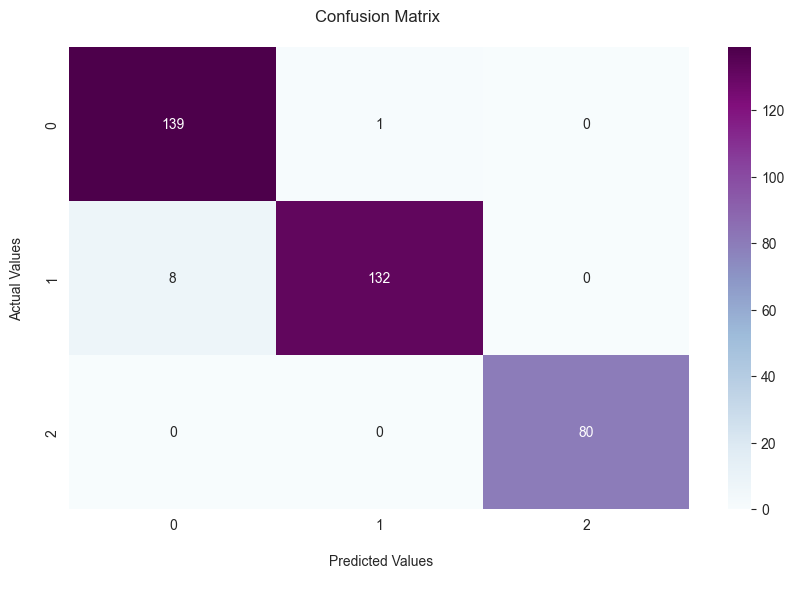

In [24]:
con_mat_plt(summary_confusion_mat)

# Noisy data summary results

In [25]:
from sklearn.model_selection import train_test_split
XN_train, XN_test = train_test_split(X, test_size=0.2, random_state=42)

In [26]:
mykNN(XN_train, y_train, XN_test, k,'euclidean')

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [27]:
best_params, res_sum, summary_confusion_mat, summary_precision, summary_recall = myNestedCrossVal(XN, y, 5, list(range(1, 11)), ['euclidean','manhattan'], mySeed)

Fold 1,Validation Accuracy: 0.9428571428571428, Distance: euclidean, Best k: 3 
Confusion Matrix for Fold 1:
 [[14.  0.  0.]
 [ 1. 13.  0.]
 [ 0.  1.  7.]]
Fold 1,Validation Accuracy: 0.9714285714285714, Distance: manhattan, Best k: 9 
Confusion Matrix for Fold 1:
 [[14.  0.  0.]
 [ 1. 13.  0.]
 [ 0.  0.  8.]]
------------------------------------------------------------------------------------
Fold 1 Best Parameters: k=9, distance_metric=manhattan, accuracy=0.9714285714285714
------------------------------------------------------------------------------------
Fold 2,Validation Accuracy: 0.8857142857142857, Distance: euclidean, Best k: 1 
Confusion Matrix for Fold 2:
 [[14.  0.  0.]
 [ 1. 12.  1.]
 [ 0.  1.  7.]]
Fold 2,Validation Accuracy: 0.8857142857142857, Distance: manhattan, Best k: 1 
Confusion Matrix for Fold 2:
 [[14.  0.  0.]
 [ 1. 12.  1.]
 [ 0.  0.  8.]]
------------------------------------------------------------------------------------
Fold 2 Best Parameters: k=1, distance

In [28]:
best_params_df = pd.DataFrame.from_dict(best_params,orient='index')
best_params_df

,fold,accuracy,k,distance
0,1,0.971429,9,manhattan
1,2,0.885714,1,euclidean
2,3,0.885714,5,euclidean
3,4,0.885714,3,euclidean
4,5,0.971429,10,euclidean


### Confusion matrix summary

In [29]:
summary_conf_mat = pd.DataFrame(summary_confusion_mat, columns=['1','2','3'], index=['1','2','3'])
summary_conf_mat['Precision'] = summary_precision
summary_conf_mat.loc['Recall', :'3'] = summary_recall
summary_conf_mat

,1,2,3,Precision
1,140.0,0.0,0.000,0.921053
2,12.0,126.0,2.000,0.984375
3,0.0,2.0,78.000,0.975000
Recall,1.0,0.9,0.975,NaN


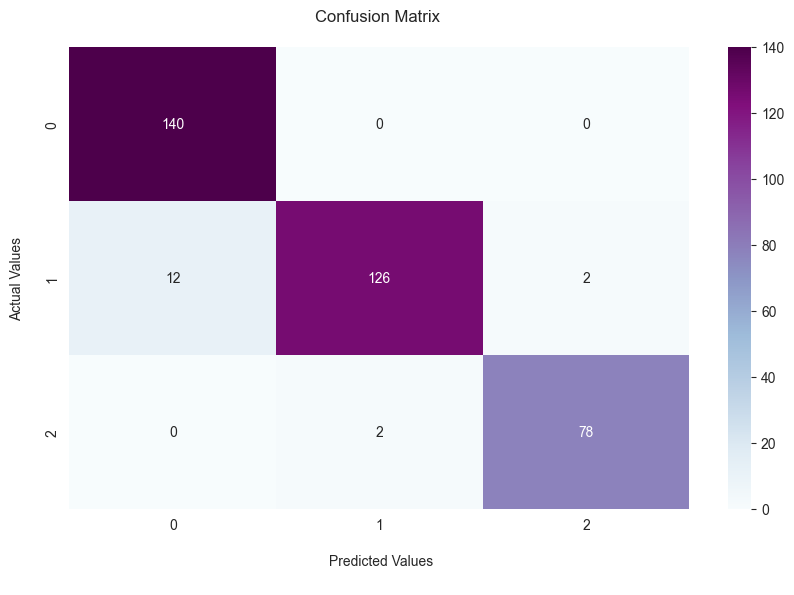

In [30]:
con_mat_plt(summary_confusion_mat)

# Questions to answer

### Influence of noise
---
Do the best parameters change when noise is added to the data?

Answer : The presence of noise in a dataset can have a significant impact on the performance of a machine learning mode, and can lead to a significant decrease in the accuracy, and it can cause the model to overfit or underfit the data. The best parameters for a model may change when noise is added to the data because the model may need to be more complex or use different techniques to account for the added noise <div class="alert alert-block alert-info">On our data set we can see that the model loses a bit of it accuracy when noise is added</div>


### Tie break :
---
Assume that you have selected the number of neighbours to be an even number,
e.g., 2. For one of the neighbours, the suggested class is 1,
and for the other neighbour the suggested class is 2.
How would you break the tie? Write example pseudocode that does this.

Answer : One way to break a tie when an even number of neighbours are used in a k-NN classifier is to use a majority vote.
Pseudocode :
 ```
# Count the number of times each class appears
class_1_count = 0
class_2_count = 0
if neighbour_1_class == 1:
  class_1_count += 1
else:
  class_2_count += 1
if neighbour_2_class == 1:
  class_1_count += 1
else:
  class_2_count += 1
# Use a majority vote to decide the final class
if class_1_count > class_2_count:
  return 1
else:
  return 2
  ```
<div class="alert alert-block alert-info">It counts the number of times each class appears. Then, it uses a majority vote to decide the final class and return it.</div>
PS : If we had more than 4 classes, we would Randomly select between tied neighbors
